### Imports

In [1]:
import functools as ft
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns

from bagpy import bagreader

### Constants

In [2]:
bag_dir = '../data/pb_rosbag/Plytki/kwadrat/2023-01-16-18-40-44'

### Load data from csv

In [3]:
bag_file_path = bag_dir + '.bag'
b = bagreader(bag_file_path)

[INFO]  Data folder ../data/pb_rosbag/Plytki/kwadrat/2023-01-16-18-40-44 already exists. Not creating.


In [4]:
b.topic_table

,Topics,Types,Message Count,Frequency
0,/Servo_data,kin_odom_msg/Measurements,1494,20.772211
1,/cmd_vel,geometry_msgs/Twist,4487,68.557344
2,/filter/quaternion,geometry_msgs/QuaternionStamped,7310,309.177650
3,/ground,std_msgs/String,2,1.186757
4,/imu/acceleration,geometry_msgs/Vector3Stamped,7307,307.951836
5,/imu/angular_velocity,geometry_msgs/Vector3Stamped,7307,306.612376
6,/imu/data,sensor_msgs/Imu,7307,310.355840
7,/imu/mag,geometry_msgs/Vector3Stamped,7307,305.095763
8,/imu/time_ref,sensor_msgs/TimeReference,7294,306.511546
9,/odom,nav_msgs/Odometry,3735,54.793123


In [5]:
topic_data = {file[:-4]: pd.read_csv(os.path.join(bag_dir, file)) for file in os.listdir(bag_dir)}

### Topics visualization

In [6]:
cmd_vel = topic_data['cmd_vel']
cmd_vel

,Time,linear.x,linear.y,linear.z,angular.x,angular.y,angular.z
0,1.673891e+09,0.000000,0.0,0.0,0.0,0.0,0.000000
1,1.673891e+09,0.000000,0.0,0.0,0.0,0.0,0.000000
2,1.673891e+09,0.000000,0.0,0.0,0.0,0.0,-0.012769
3,1.673891e+09,0.000000,0.0,0.0,0.0,0.0,-0.012769
4,1.673891e+09,0.000000,0.0,0.0,0.0,0.0,-0.015275
...,...,...,...,...,...,...,...
4482,1.673891e+09,0.000000,0.0,0.0,0.0,0.0,0.012162
4483,1.673891e+09,0.000000,0.0,0.0,0.0,0.0,0.010999
4484,1.673891e+09,0.000000,0.0,0.0,0.0,0.0,0.008717
4485,1.673891e+09,-0.063228,0.0,0.0,0.0,0.0,0.006543


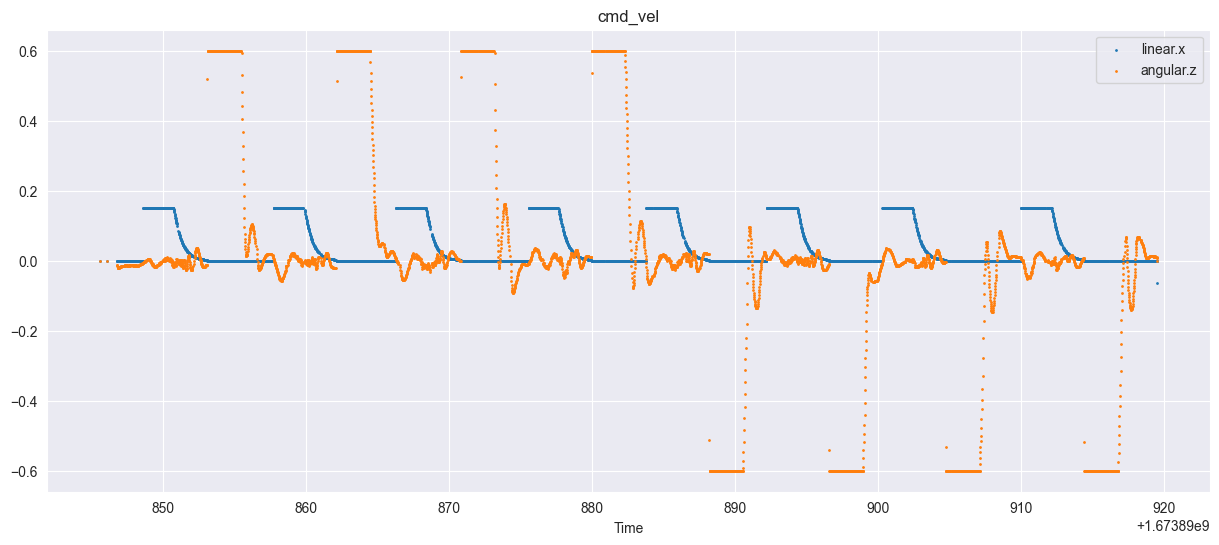

In [7]:
plt.rcParams['figure.figsize'] = [15, 6]
cols = ['linear.x', 'angular.z']
for col in cols:
    plt.scatter(x=cmd_vel['Time'], y=cmd_vel[col], s=1, label=col)
plt.title('cmd_vel')
plt.xlabel('Time')
plt.legend()
plt.show()

In [8]:
filter_quaternion = topic_data['filter-quaternion']
filter_quaternion

,Time,header.seq,header.stamp.secs,header.stamp.nsecs,header.frame_id,quaternion.x,quaternion.y,quaternion.z,quaternion.w
0,1.673891e+09,690693,1673890844,63637693,imu_link,0.008852,0.000762,-0.512306,0.858757
1,1.673891e+09,690694,1673890844,63653287,imu_link,0.008846,0.000763,-0.512305,0.858758
2,1.673891e+09,690695,1673890844,63661424,imu_link,0.008852,0.000775,-0.512298,0.858762
3,1.673891e+09,690696,1673890844,63669503,imu_link,0.008866,0.000774,-0.512313,0.858753
4,1.673891e+09,690697,1673890844,63677142,imu_link,0.008865,0.000764,-0.512339,0.858738
...,...,...,...,...,...,...,...,...,...
7305,1.673891e+09,697998,1673890918,740064633,imu_link,0.004053,0.003499,-0.565224,0.824920
7306,1.673891e+09,697999,1673890918,740073163,imu_link,0.004055,0.003502,-0.565232,0.824915
7307,1.673891e+09,698000,1673890918,740081202,imu_link,0.004048,0.003493,-0.565225,0.824919
7308,1.673891e+09,698001,1673890918,740093352,imu_link,0.004047,0.003503,-0.565230,0.824916


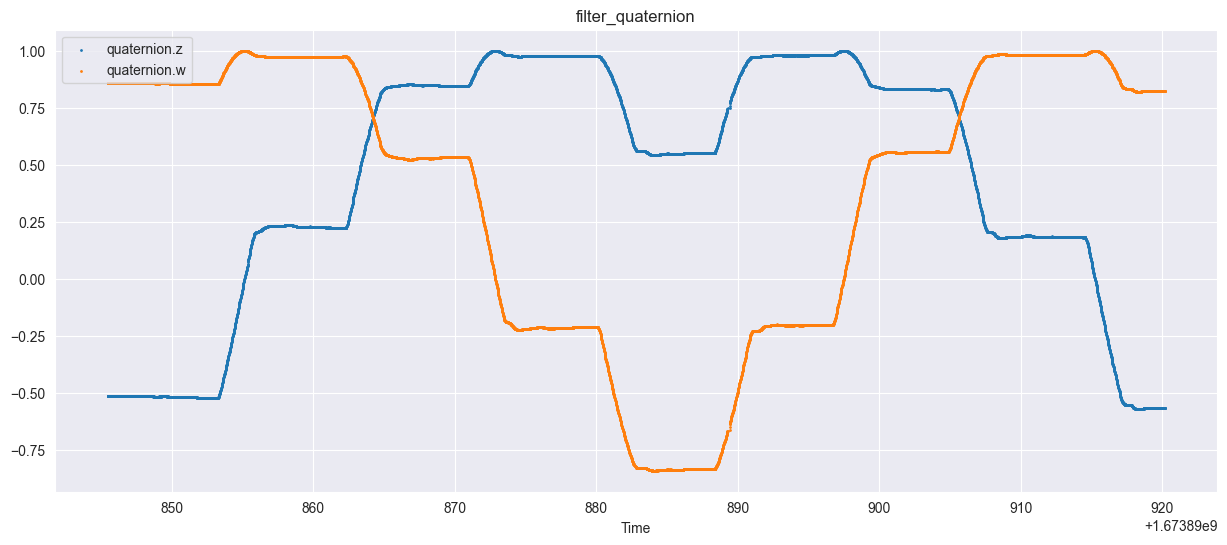

In [9]:
plt.rcParams['figure.figsize'] = [15, 6]
cols = ['quaternion.z', 'quaternion.w']
for col in cols:
    plt.scatter(x=filter_quaternion['Time'], y=filter_quaternion[col], s=1, label=col)
plt.title('filter_quaternion')
plt.xlabel('Time')
plt.legend()
plt.show()

In [10]:
imu_acceleration = topic_data['imu-acceleration']
imu_acceleration

,Time,header.seq,header.stamp.secs,header.stamp.nsecs,header.frame_id,vector.x,vector.y,vector.z
0,1.673891e+09,690695,1673890844,63637693,imu_link,-0.053928,0.119172,9.996686
1,1.673891e+09,690696,1673890844,63653287,imu_link,-0.075644,0.134198,10.017207
2,1.673891e+09,690697,1673890844,63661424,imu_link,-0.072376,0.152013,10.025445
3,1.673891e+09,690698,1673890844,63669503,imu_link,-0.065985,0.143522,9.977566
4,1.673891e+09,690699,1673890844,63677142,imu_link,-0.073469,0.154018,10.005657
...,...,...,...,...,...,...,...,...
7302,1.673891e+09,697997,1673890918,680229679,imu_link,-0.073347,0.148852,9.976594
7303,1.673891e+09,697998,1673890918,680238683,imu_link,-0.061842,0.145463,9.999793
7304,1.673891e+09,697999,1673890918,740048755,imu_link,-0.068855,0.138270,10.000739
7305,1.673891e+09,698000,1673890918,740064633,imu_link,-0.073457,0.154862,10.016021


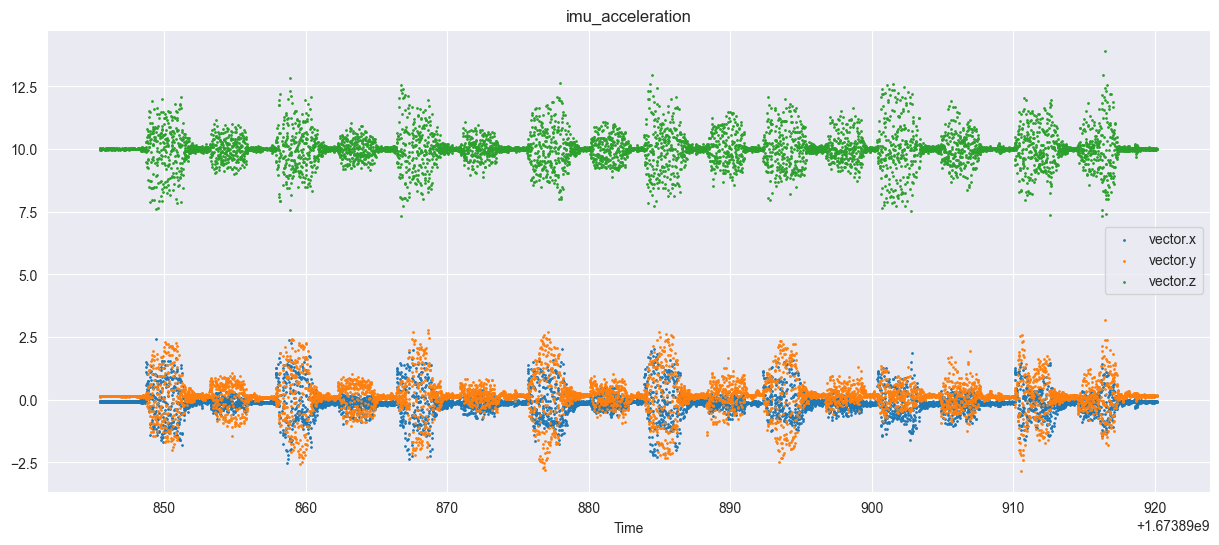

In [11]:
plt.rcParams['figure.figsize'] = [15, 6]
cols = ['vector.x', 'vector.y', 'vector.z']
for col in cols:
    plt.scatter(x=imu_acceleration['Time'], y=imu_acceleration[col], s=1, label=col)
plt.title('imu_acceleration')
plt.xlabel('Time')
plt.legend()
plt.show()

In [12]:
imu_angular_velocity = topic_data['imu-angular_velocity']
imu_angular_velocity

,Time,header.seq,header.stamp.secs,header.stamp.nsecs,header.frame_id,vector.x,vector.y,vector.z
0,1.673891e+09,690695,1673890844,63637693,imu_link,0.012104,-0.000784,-0.013477
1,1.673891e+09,690696,1673890844,63653287,imu_link,0.011369,0.000621,-0.011161
2,1.673891e+09,690697,1673890844,63661424,imu_link,0.012719,0.001889,-0.011753
3,1.673891e+09,690698,1673890844,63669503,imu_link,0.013356,0.000369,-0.013915
4,1.673891e+09,690699,1673890844,63677142,imu_link,0.012492,0.000256,-0.014898
...,...,...,...,...,...,...,...,...
7302,1.673891e+09,697997,1673890918,680229679,imu_link,0.008997,0.000106,-0.011477
7303,1.673891e+09,697998,1673890918,680238683,imu_link,0.012809,0.000929,-0.011773
7304,1.673891e+09,697999,1673890918,740048755,imu_link,0.014502,0.000956,-0.012553
7305,1.673891e+09,698000,1673890918,740064633,imu_link,0.013232,0.001629,-0.014421


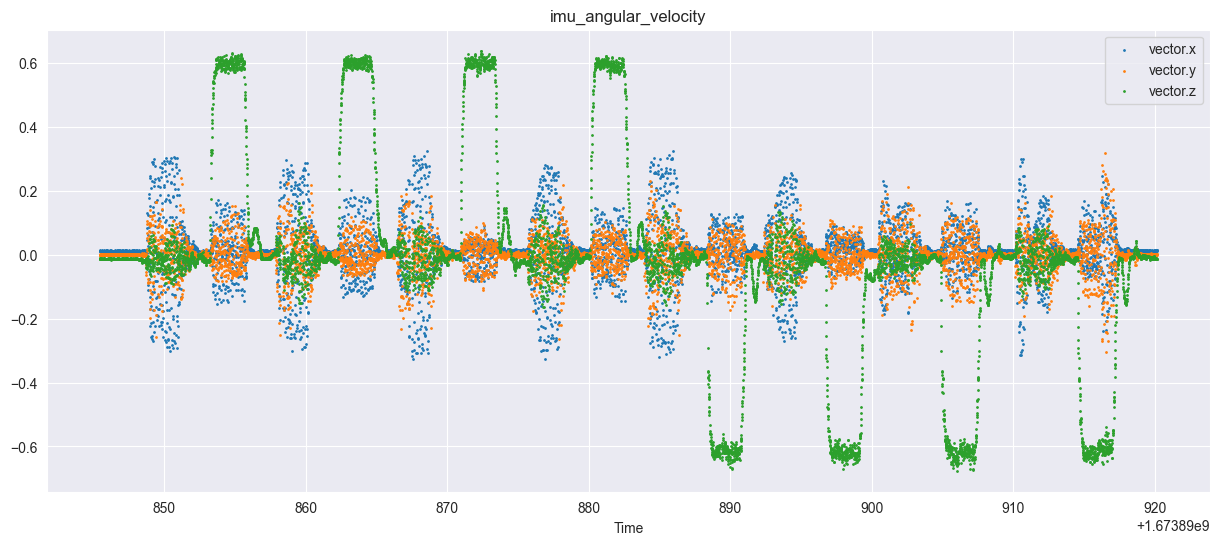

In [13]:
plt.rcParams['figure.figsize'] = [15, 6]
cols = ['vector.x', 'vector.y', 'vector.z']
for col in cols:
    plt.scatter(x=imu_angular_velocity['Time'], y=imu_angular_velocity[col], s=1, label=col)
plt.title('imu_angular_velocity')
plt.xlabel('Time')
plt.legend()
plt.show()

In [14]:
imu_mag = topic_data['imu-mag']
imu_mag

,Time,header.seq,header.stamp.secs,header.stamp.nsecs,header.frame_id,vector.x,vector.y,vector.z
0,1.673891e+09,690695,1673890844,63637693,imu_link,1.332009,0.630525,-1.439059
1,1.673891e+09,690696,1673890844,63653287,imu_link,1.319790,0.625925,-1.420560
2,1.673891e+09,690697,1673890844,63661424,imu_link,1.316905,0.661897,-1.423716
3,1.673891e+09,690698,1673890844,63669503,imu_link,1.335072,0.654726,-1.434044
4,1.673891e+09,690699,1673890844,63677142,imu_link,1.337998,0.618534,-1.441491
...,...,...,...,...,...,...,...,...
7302,1.673891e+09,697997,1673890918,680229679,imu_link,1.177963,0.950978,-1.306964
7303,1.673891e+09,697998,1673890918,680238683,imu_link,1.178001,0.982018,-1.317980
7304,1.673891e+09,697999,1673890918,740048755,imu_link,1.191164,0.974719,-1.331009
7305,1.673891e+09,698000,1673890918,740064633,imu_link,1.195592,0.950792,-1.327996


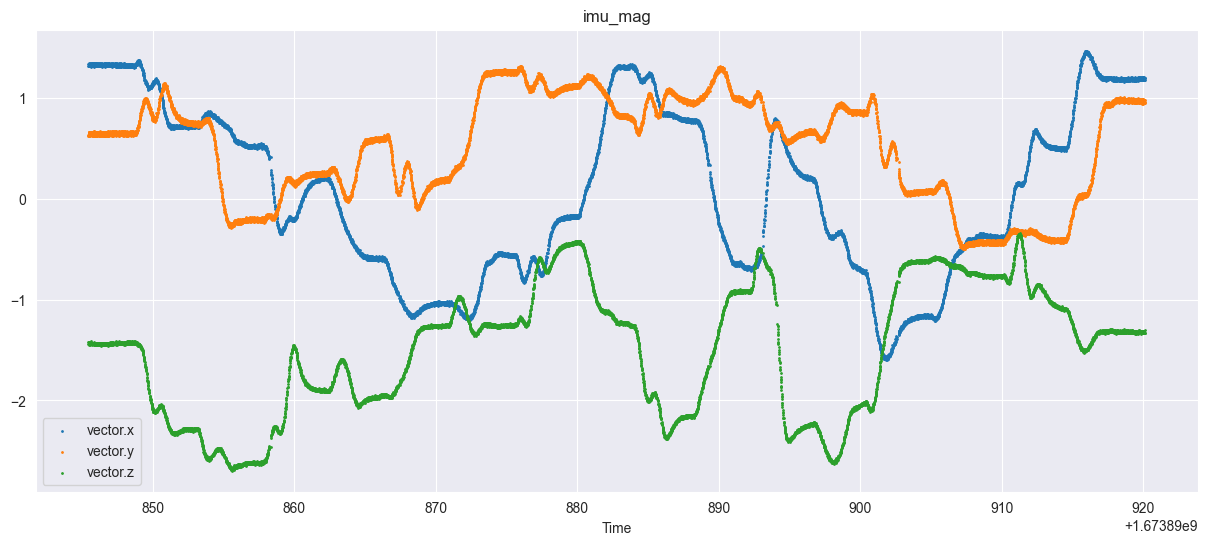

In [15]:
plt.rcParams['figure.figsize'] = [15, 6]
cols = ['vector.x', 'vector.y', 'vector.z']
for col in cols:
    plt.scatter(x=imu_mag['Time'], y=imu_mag[col], s=1, label=col)
plt.title('imu_mag')
plt.xlabel('Time')
plt.legend()
plt.show()

In [16]:
odom = topic_data['odom']
odom

,Time,header.seq,header.stamp.secs,header.stamp.nsecs,header.frame_id,child_frame_id,pose.pose.position.x,pose.pose.position.y,pose.pose.position.z,pose.pose.orientation.x,...,pose.pose.orientation.z,pose.pose.orientation.w,pose.covariance,twist.twist.linear.x,twist.twist.linear.y,twist.twist.linear.z,twist.twist.angular.x,twist.twist.angular.y,twist.twist.angular.z,twist.covariance
0,1.673891e+09,678103,1673890844,60127090,odom,base_link,-0.003613,0.007279,0.0,0.0,...,0.001776,0.999998,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,0.0,0.0,0.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,1.673891e+09,678104,1673890844,80095994,odom,base_link,-0.003613,0.007279,0.0,0.0,...,0.001776,0.999998,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,0.0,0.0,0.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,1.673891e+09,678105,1673890844,100092185,odom,base_link,-0.003613,0.007279,0.0,0.0,...,0.001776,0.999998,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,0.0,0.0,0.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,1.673891e+09,678106,1673890844,120018154,odom,base_link,-0.003613,0.007279,0.0,0.0,...,0.001776,0.999998,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,0.0,0.0,0.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,1.673891e+09,678107,1673890844,140100610,odom,base_link,-0.003613,0.007279,0.0,0.0,...,0.001776,0.999998,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,0.0,0.0,0.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3730,1.673891e+09,681833,1673890918,660155782,odom,base_link,-0.074699,0.033023,0.0,0.0,...,-0.043943,0.999034,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,0.0,0.0,0.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3731,1.673891e+09,681834,1673890918,680059030,odom,base_link,-0.074699,0.033023,0.0,0.0,...,-0.043943,0.999034,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,0.0,0.0,0.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3732,1.673891e+09,681835,1673890918,700106092,odom,base_link,-0.074699,0.033023,0.0,0.0,...,-0.043943,0.999034,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,0.0,0.0,0.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3733,1.673891e+09,681836,1673890918,720057236,odom,base_link,-0.074699,0.033023,0.0,0.0,...,-0.043943,0.999034,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,0.0,0.0,0.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


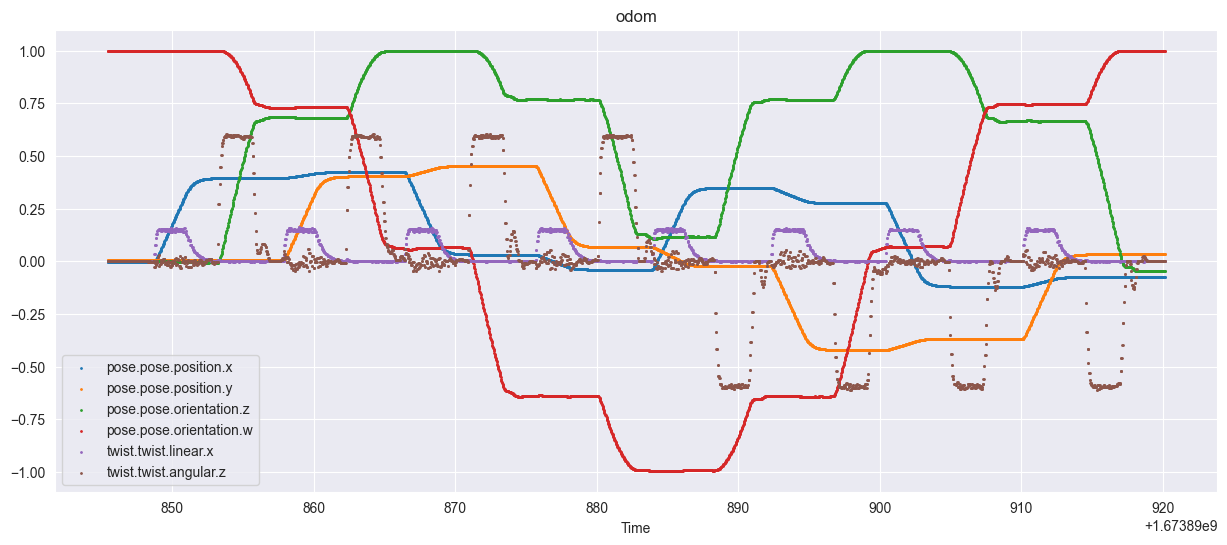

In [17]:
plt.rcParams['figure.figsize'] = [15, 6]
cols = ['pose.pose.position.x', 'pose.pose.position.y', 'pose.pose.orientation.z', 'pose.pose.orientation.w', 'twist.twist.linear.x', 'twist.twist.angular.z']
for col in cols:
    plt.scatter(x=odom['Time'], y=odom[col], s=1, label=col)
plt.title('odom')
plt.xlabel('Time')
plt.legend()
plt.show()

### Refine data

In [18]:
imu_data = topic_data['imu-data']

In [20]:
cmd_vel_refined = cmd_vel.drop(columns=['linear.y', 'linear.z', 'angular.x', 'angular.y'])
filter_quaternion_refined = imu_data[['Time', 'orientation.z', 'orientation.w']]
imu_acceleration_refined = imu_data[['Time', 'linear_acceleration.x', 'linear_acceleration.y', 'linear_acceleration.z']]
imu_angular_velocity_refined = imu_data[['Time', 'angular_velocity.x', 'angular_velocity.y', 'angular_velocity.z']]
imu_mag_refined = imu_mag.drop(columns=['header.seq', 'header.stamp.secs', 'header.stamp.nsecs', 'header.frame_id'])
odom_refined = odom.drop(columns=['header.seq', 'header.stamp.secs', 'header.stamp.nsecs', 'header.frame_id', 'child_frame_id', 'pose.covariance', 'twist.covariance',
                                  'pose.pose.position.z', 'pose.pose.orientation.x', 'pose.pose.orientation.y',
                                  'twist.twist.linear.y', 'twist.twist.linear.z', 'twist.twist.angular.x', 'twist.twist.angular.y'])

In [21]:
dataframes = [cmd_vel_refined, imu_acceleration_refined, imu_angular_velocity_refined, odom_refined]
dataframe = ft.reduce(lambda left, right: pd.merge(left, right, how='outer', on='Time'), dataframes)
dataframe.ffill(inplace=True)
dataframe.bfill(inplace=True)
dataframe['Time'] -= dataframe['Time'].min()
# dataframe.set_index('Time', inplace=True)
dataframe

,Time,linear.x,angular.z,orientation.z,orientation.w,linear_acceleration.x,linear_acceleration.y,linear_acceleration.z,angular_velocity.x,angular_velocity.y,angular_velocity.z,vector.x,vector.y,vector.z,pose.pose.position.x,pose.pose.position.y,pose.pose.orientation.z,pose.pose.orientation.w,twist.twist.linear.x,twist.twist.angular.z
0,0.000000,0.0,0.0,-0.512306,0.858757,-0.053928,0.119172,9.996686,0.012104,-0.000784,-0.013477,1.332009,0.630525,-1.439059,-0.003613,0.007279,0.001776,0.999998,0.0,0.0
1,0.005265,0.0,0.0,-0.512306,0.858757,-0.053928,0.119172,9.996686,0.012104,-0.000784,-0.013477,1.332009,0.630525,-1.439059,-0.003613,0.007279,0.001776,0.999998,0.0,0.0
2,0.005300,0.0,0.0,-0.512306,0.858757,-0.053928,0.119172,9.996686,0.012104,-0.000784,-0.013477,1.332009,0.630525,-1.439059,-0.003613,0.007279,0.001776,0.999998,0.0,0.0
3,0.007219,0.0,0.0,-0.512305,0.858758,-0.075644,0.134198,10.017207,0.011369,0.000621,-0.011161,1.332009,0.630525,-1.439059,-0.003613,0.007279,0.001776,0.999998,0.0,0.0
4,0.007259,0.0,0.0,-0.512305,0.858758,-0.075644,0.134198,10.017207,0.011369,0.000621,-0.011161,1.319790,0.625925,-1.420560,-0.003613,0.007279,0.001776,0.999998,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22827,74.694807,0.0,0.0,-0.565224,0.824920,-0.073457,0.154862,10.016021,0.013232,0.001629,-0.014421,1.195592,0.950792,-1.327996,-0.074699,0.033023,-0.043943,0.999034,0.0,0.0
22828,74.694850,0.0,0.0,-0.565232,0.824915,-0.072416,0.168538,9.992639,0.012553,-0.000117,-0.011881,1.195592,0.950792,-1.327996,-0.074699,0.033023,-0.043943,0.999034,0.0,0.0
22829,74.694859,0.0,0.0,-0.565232,0.824915,-0.072416,0.168538,9.992639,0.012553,-0.000117,-0.011881,1.195592,0.950792,-1.327996,-0.074699,0.033023,-0.043943,0.999034,0.0,0.0
22830,74.694875,0.0,0.0,-0.565232,0.824915,-0.072416,0.168538,9.992639,0.012553,-0.000117,-0.011881,1.195592,0.950792,-1.327996,-0.074699,0.033023,-0.043943,0.999034,0.0,0.0


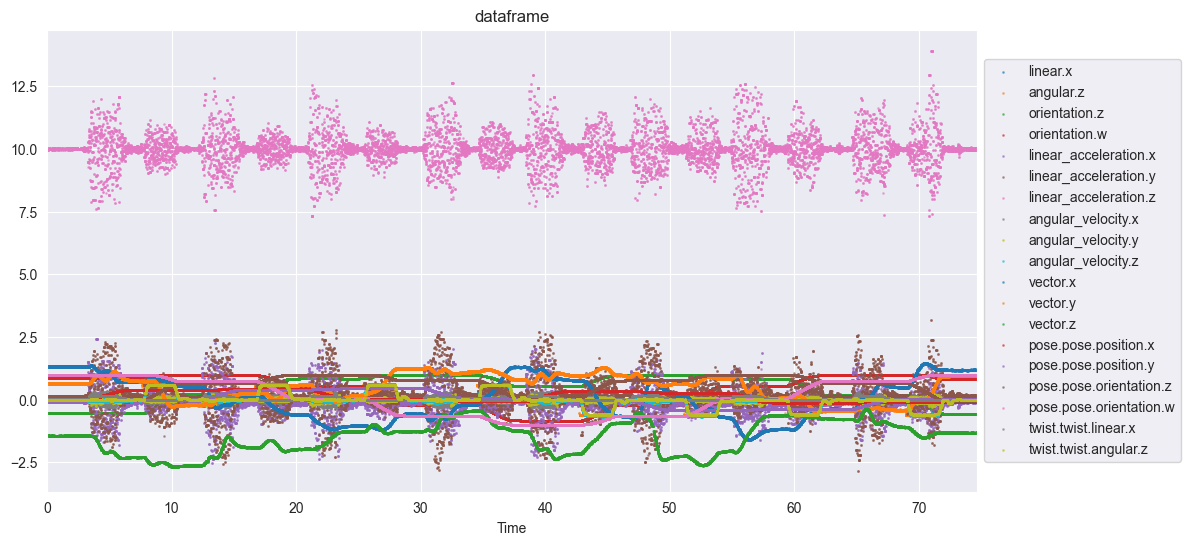

In [22]:
fig, ax = plt.subplots(figsize=(15, 6))

for column in dataframe.columns[1:]:
    ax.scatter(x=dataframe['Time'], y=dataframe[column], s=1, alpha=0.5, label=column)
ax.set_title('dataframe')
ax.set_xlabel('Time')
ax.set_xlim(dataframe['Time'].min(), dataframe['Time'].max())

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

### Add data labels

### Correlation matrix

(19.5, -0.5)

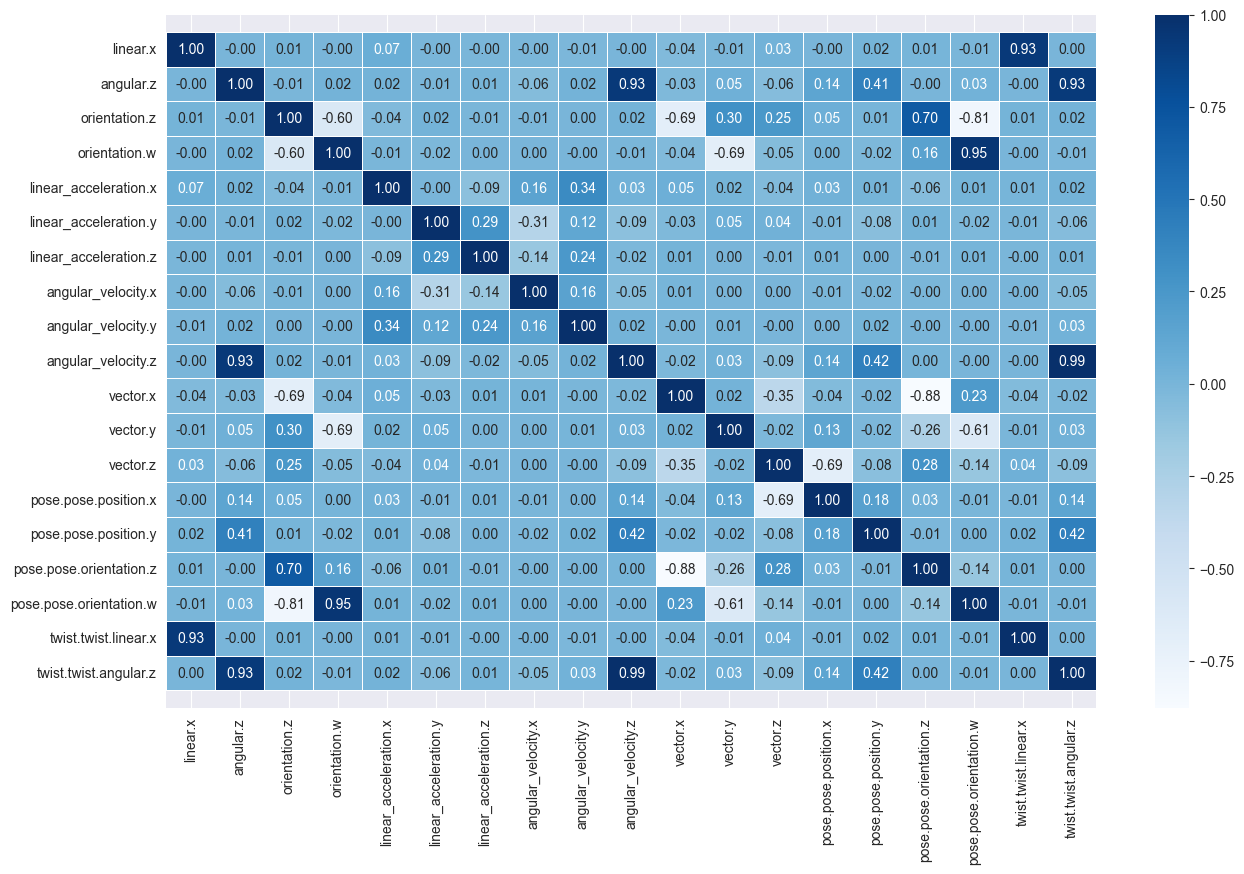

In [25]:
corr_matrix = dataframe.corr()
fig, ax = plt.subplots(figsize=(15, 9))
sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt=".2f", cmap="Blues")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

### Correlation visualizations

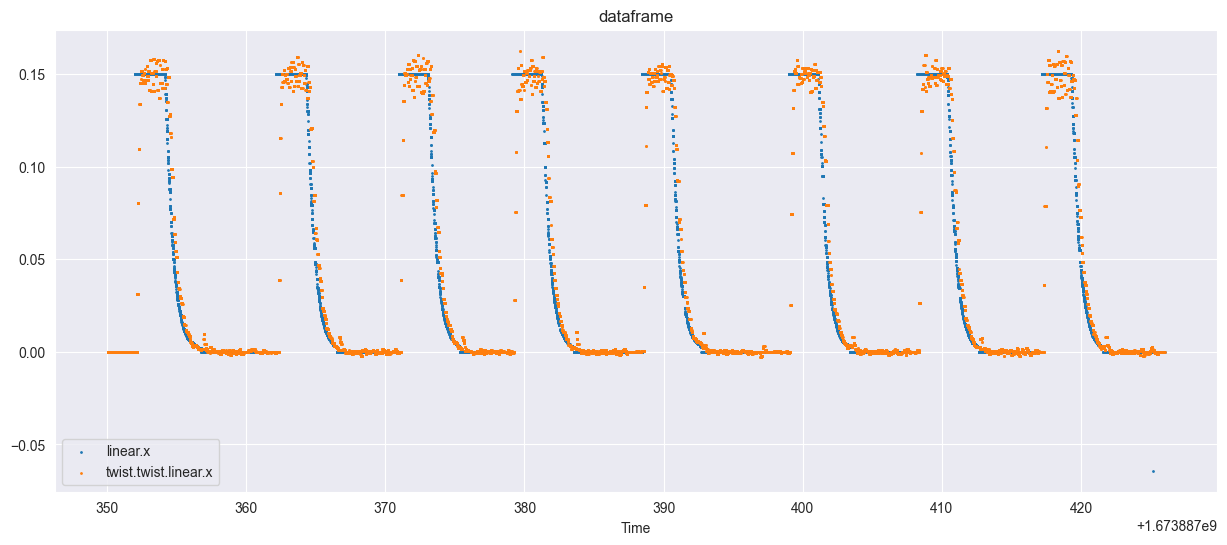

In [26]:
# cmd_vel / odom
plt.rcParams['figure.figsize'] = [15, 6]
cols = ['linear.x', 'twist.twist.linear.x']
for col in cols:
    plt.scatter(x=dataframe.index, y=dataframe[col], s=1, label=col)
plt.title('dataframe')
plt.xlabel('Time')
plt.legend()
plt.show()

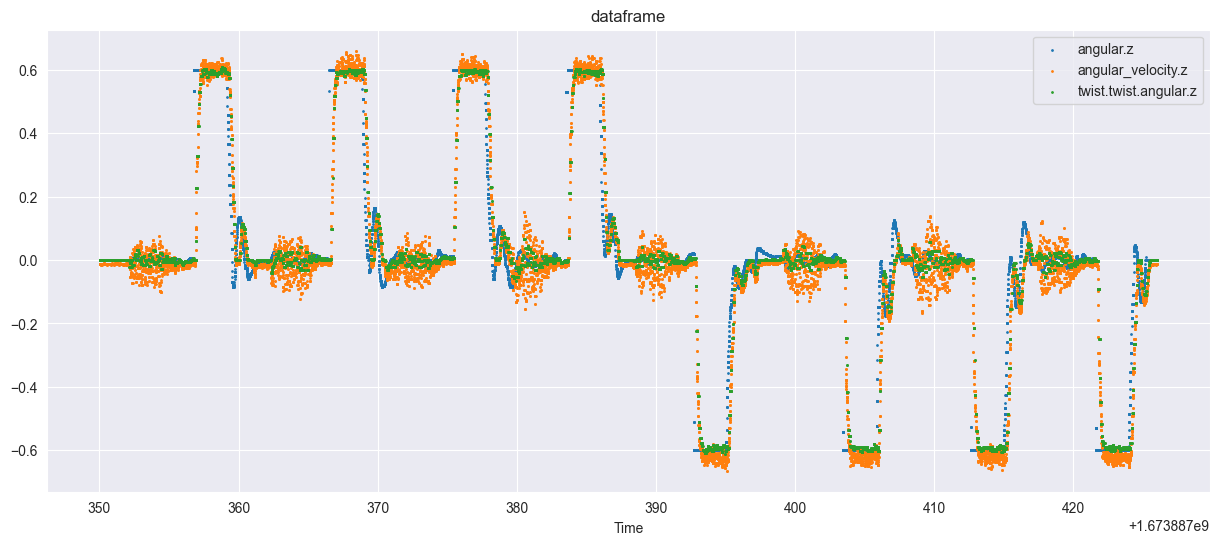

In [27]:
# cmd_vel / imu_angular_velocity / odom
plt.rcParams['figure.figsize'] = [15, 6]
cols = ['angular.z', 'angular_velocity.z', 'twist.twist.angular.z']
for col in cols:
    plt.scatter(x=dataframe.index, y=dataframe[col], s=1, label=col)
plt.title('dataframe')
plt.xlabel('Time')
plt.legend()
plt.show()

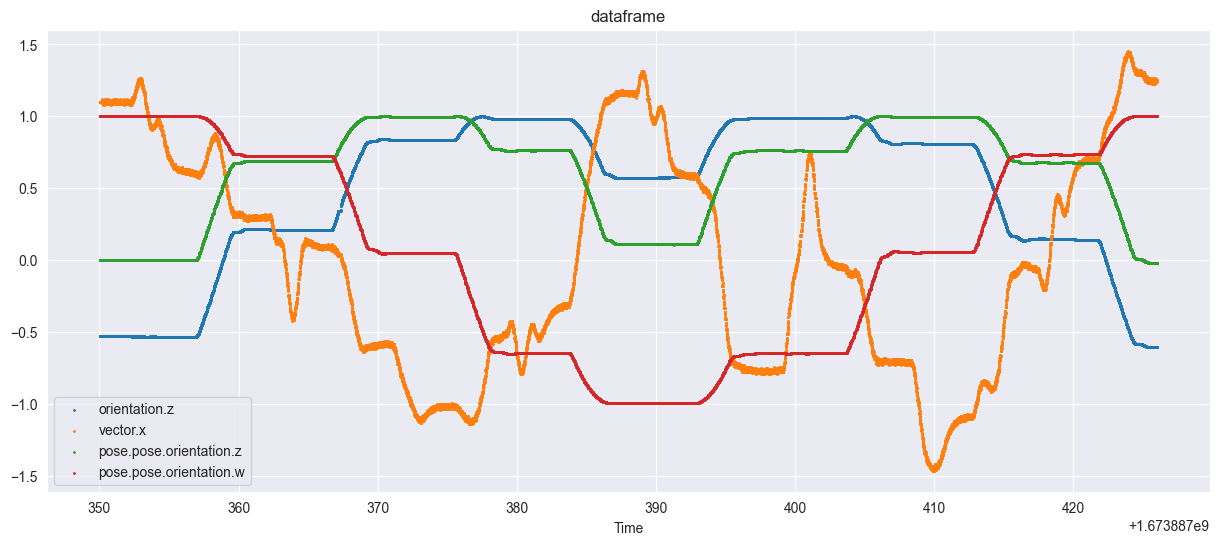

In [28]:
# filter_quaternion / imu_mag / odom
plt.rcParams['figure.figsize'] = [15, 6]
cols = ['orientation.z', 'vector.x', 'pose.pose.orientation.z', 'pose.pose.orientation.w']
for col in cols:
    plt.scatter(x=dataframe.index, y=dataframe[col], s=1, label=col)
plt.title('dataframe')
plt.xlabel('Time')
plt.legend()
plt.show()

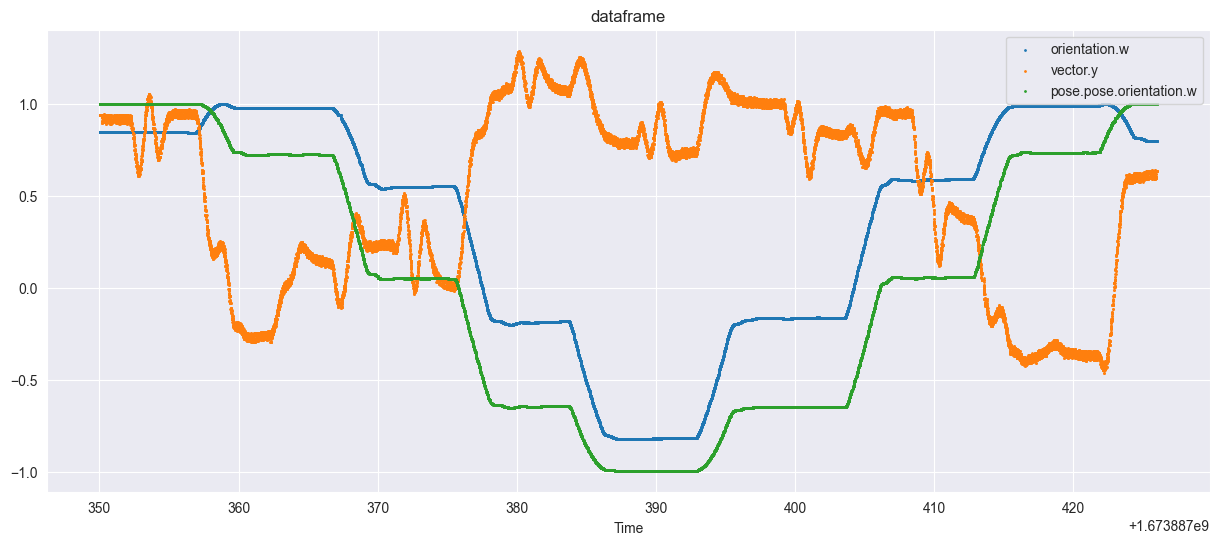

In [29]:
# filter_quaternion / imu_mag / odom
plt.rcParams['figure.figsize'] = [15, 6]
cols = ['orientation.w', 'vector.y', 'pose.pose.orientation.w']
for col in cols:
    plt.scatter(x=dataframe.index, y=dataframe[col], s=1, label=col)
plt.title('dataframe')
plt.xlabel('Time')
plt.legend()
plt.show()

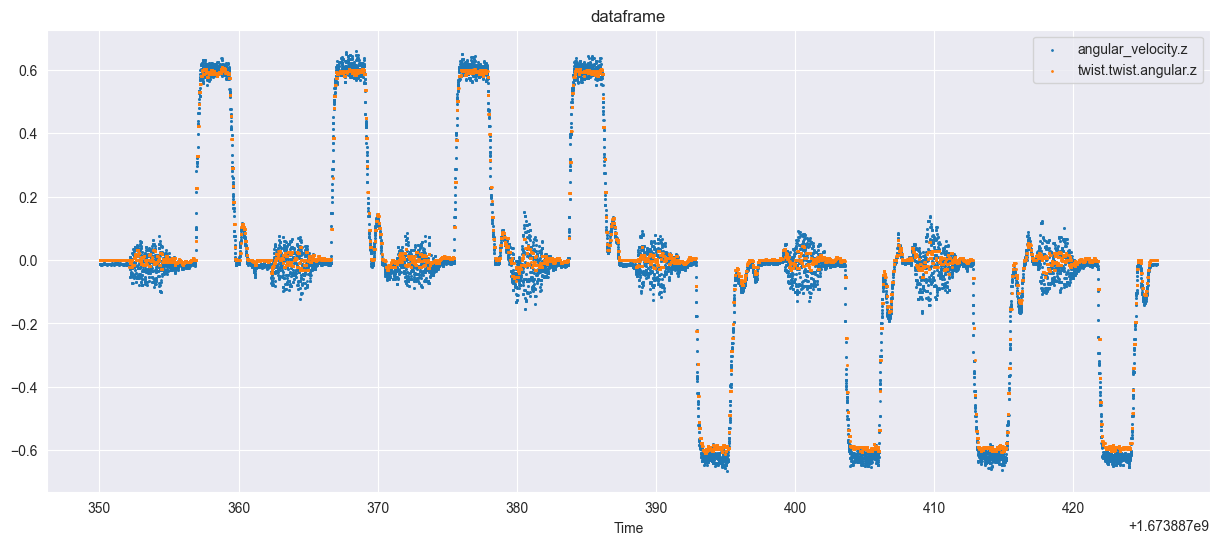

In [30]:
# imu_angular_velocity / odom
plt.rcParams['figure.figsize'] = [15, 6]
cols = ['angular_velocity.z', 'twist.twist.angular.z']
for col in cols:
    plt.scatter(x=dataframe.index, y=dataframe[col], s=1, label=col)
plt.title('dataframe')
plt.xlabel('Time')
plt.legend()
plt.show()

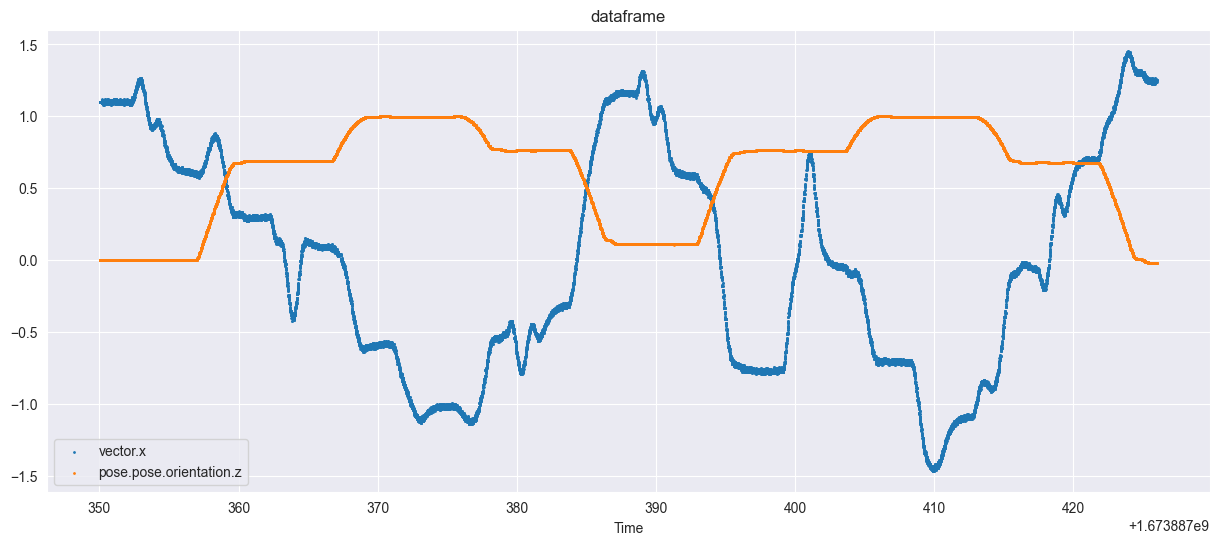

In [31]:
# imu_mag / odom
plt.rcParams['figure.figsize'] = [15, 6]
cols = ['vector.x', 'pose.pose.orientation.z']
for col in cols:
    plt.scatter(x=dataframe.index, y=dataframe[col], s=1, label=col)
plt.title('dataframe')
plt.xlabel('Time')
plt.legend()
plt.show()

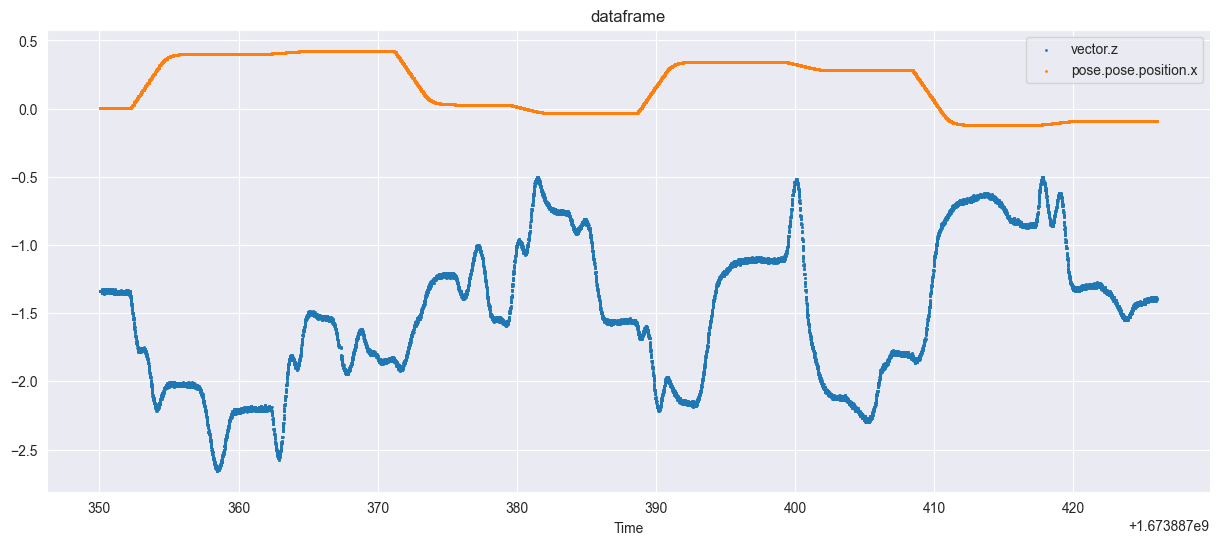

In [32]:
# imu_mag / odom
plt.rcParams['figure.figsize'] = [15, 6]
cols = ['vector.z', 'pose.pose.position.x']
for col in cols:
    plt.scatter(x=dataframe.index, y=dataframe[col], s=1, label=col)
plt.title('dataframe')
plt.xlabel('Time')
plt.legend()
plt.show()

### Target datasets

In [33]:
dataframe_no_odom = dataframe.drop(columns=['pose.pose.position.x', 'pose.pose.position.y', 'pose.pose.orientation.z', 'pose.pose.orientation.w', 'twist.twist.linear.x', 'twist.twist.angular.z'])

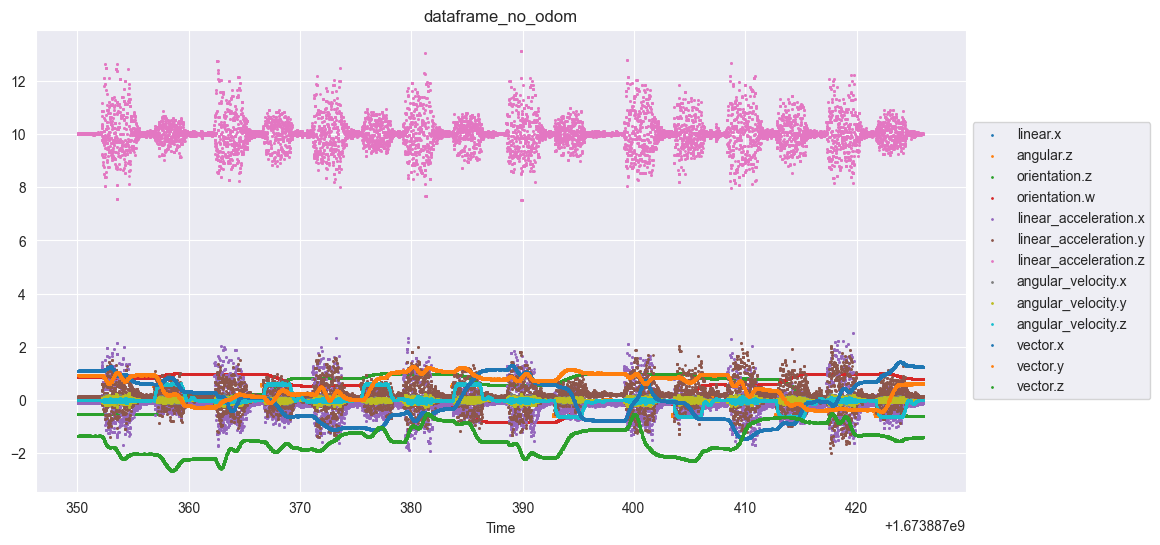

In [34]:
_, ax = plt.subplots(figsize=(15, 6))

for column in dataframe_no_odom.columns:
    ax.scatter(x=dataframe_no_odom.index, y=dataframe_no_odom[column], s=1, label=column)
ax.set_title('dataframe_no_odom')
ax.set_xlabel('Time')

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()